In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_log_error as rmsle
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import sklearn.metrics
import xgboost as xgb
import seaborn as sns
import itertools
import optuna
from autogluon.tabular import TabularPredictor

In [2]:
train = pd.read_csv("train_comp.csv")
test = pd.read_csv("test_comp.csv")
# sample = pd.read_csv("sample_submission.csv")

train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189,82,26,101,41.0,150
1,female,64,163,60,8,85,39.7,34
2,female,51,161,64,7,84,39.8,29
3,male,20,192,90,25,105,40.7,140
4,female,38,166,61,25,102,40.6,146


In [3]:
train_log = train
train_log['Calories'] = np.log1p(train['Calories'])

train_log.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189,82,26,101,41.0,5.017280
1,female,64,163,60,8,85,39.7,3.555348
2,female,51,161,64,7,84,39.8,3.401197
3,male,20,192,90,25,105,40.7,4.948760
4,female,38,166,61,25,102,40.6,4.990433


In [4]:
# Split data into training and testing sets
train_data, test_data = train_test_split(train_log, test_size=0.2, random_state=724)

In [ ]:
# kaggle score 0.0???? private, 0.0???? public (autogluon_prediction_8.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_data, presets="medium_quality", time_limit=3600, num_bag_folds=5)

# Make predictions
train_pred = predictor.predict(train_data)
test_pred = predictor.predict(test_data)
predictions = predictor.predict(test)

# Evaluate
print()
print("Train prediction:", rmse(train_pred, train_data['Calories']))
print("Test prediction:", rmse(test_pred, test_data['Calories']))



# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=np.expm1(test_pred), y=np.expm1(test_data['Calories']))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()



# make the submission file!

submission = pd.DataFrame()

submission['id'] = np.arange(len(test))+750000
submission['Calories'] = np.expm1(predictions)
submission.loc[submission['Calories'] < 0, 'Calories'] = 1

submission.to_csv("autogluon_prediction_6.csv", index=False)

print(submission.head())
print()
print(submission['Calories'].describe())

No path specified. Models will be saved in: "AutogluonModels\ag-20250609_161338"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       21.65 GB / 31.61 GB (68.5%)
Disk Space Avail:   201.77 GB / 455.74 GB (44.3%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "c:\Users\eblac\Documents\GitHub\S25_Predict_Calories\AutogluonModels\ag-20250609_161338"
Train Data Rows:    600000
Train Data Columns: 7
Label Column:       Calories
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    22190.21 MB
	Train Data (Original)  Memory Usage: 58.37 MB (0.3% of available memory)
	Inferring data

No path specified. Models will be saved in: "AutogluonModels\ag-20250608_151409"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       22.55 GB / 31.61 GB (71.3%)
Disk Space Avail:   206.84 GB / 455.74 GB (45.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then hold

(_ray_fit pid=18124) [1000]	valid_set's rmse: 0.0625831
(_ray_fit pid=18124) [2000]	valid_set's rmse: 0.0610258 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=19280) [3000]	valid_set's rmse: 0.0593409 [repeated 5x across cluster]
(_ray_fit pid=18124) [4000]	valid_set's rmse: 0.0605654 [repeated 5x across cluster]
(_ray_fit pid=18124) [5000]	valid_set's rmse: 0.0604907 [repeated 5x across cluster]
(_ray_fit pid=22396) [6000]	valid_set's rmse: 0.0593362 [repeated 5x across cluster]
(_ray_fit pid=22396) [7000]	valid_set's rmse: 0.0593263 [repeated 4x across cluster]
(_ray_fit pid=22396) [8000]	valid_set's rmse: 0.0593195 [repeated 3x across cluster]
(_ray_fit pid=22396) [9000]	valid_set's rmse: 0.0593148
(_ray_fit pid=22396) [10000]	valid_set's rmse: 0.0593298


(_dystack pid=23508) 	-0.0604	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	201.28s	 = Training   runtime
(_dystack pid=23508) 	254.84s	 = Validation runtime
(_dystack pid=23508) Fitting model: LightGBM_BAG_L1 ... Training model for up to 1535.83s of the 2434.38s of remaining time.
(_dystack pid=23508) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=3, gpus=0, memory=0.88%)


(_ray_fit pid=21964) [1000]	valid_set's rmse: 0.0596077
(_ray_fit pid=24344) [1000]	valid_set's rmse: 0.062869
(_ray_fit pid=21964) [2000]	valid_set's rmse: 0.0594929 [repeated 4x across cluster]


(_dystack pid=23508) 	-0.0606	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	31.53s	 = Training   runtime
(_dystack pid=23508) 	17.85s	 = Validation runtime
(_dystack pid=23508) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 1497.86s of the 2396.40s of remaining time.
(_dystack pid=23508) c:\Users\eblac\anaconda3\envs\erdos_summer_2025\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=23508)   warnings.warn(
(_dystack pid=23508) 	-0.0635	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	59.64s	 = Training   runtime
(_dystack pid=23508) 	14.37s	 = Validation runtime
(_dystack pid=23508) Fitting model: CatBoost_BAG_L1 ... Training model for up to 1423.28s of the 2321.82s of remaining time.
(_dystack 

(_ray_fit pid=7980) [1000]	valid_set's rmse: 0.0603741


(_dystack pid=23508) 	-0.0604	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	21.23s	 = Training   runtime
(_dystack pid=23508) 	12.96s	 = Validation runtime
(_dystack pid=23508) Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 775.30s of the 1673.85s of remaining time.
(_dystack pid=23508) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=3, gpus=0, memory=2.64%)
(_dystack pid=23508) 	Warning: Exception caused CatBoost_r177_BAG_L1 to fail during training (ImportError)... Skipping this model.
(_dystack pid=23508) 		ray::_ray_fit() (pid=3484, ip=127.0.0.1)
(_dystack pid=23508)   File "c:\Users\eblac\anaconda3\envs\erdos_summer_2025\Lib\site-packages\catboost\__init__.py", line 1, in <module>
(_dystack pid=23508)     from .core import (
(_dystack pid=23508)   File "c:\Users\eblac\anaconda3\envs\erdos_summer_2025\Lib\site-packages\catboost\core.py", line 45, in <module>
(_dystack pid=23508)   

(_ray_fit pid=15704) [1000]	valid_set's rmse: 0.0596325
(_ray_fit pid=18504) [2000]	valid_set's rmse: 0.0606324 [repeated 5x across cluster]
(_ray_fit pid=18504) [3000]	valid_set's rmse: 0.0605689 [repeated 5x across cluster]
(_ray_fit pid=18504) [4000]	valid_set's rmse: 0.0606035 [repeated 5x across cluster]
(_ray_fit pid=20996) [5000]	valid_set's rmse: 0.0591161 [repeated 5x across cluster]


(_dystack pid=23508) 	-0.0603	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	91.15s	 = Training   runtime
(_dystack pid=23508) 	212.06s	 = Validation runtime
(_dystack pid=23508) Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 18.16s of the 916.70s of remaining time.
(_dystack pid=23508) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=3, gpus=0, memory=1.49%)
(_ray_fit pid=3764) 	Ran out of time, stopping training early. (Stopping on epoch 0)
(_dystack pid=23508) 	-0.0828	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	46.2s	 = Training   runtime
(_dystack pid=23508) 	12.8s	 = Validation runtime
(_ray_fit pid=21880) 	Ran out of time, stopping training early. (Stopping on epoch 0) [repeated 4x across cluster]
(_dystack pid=23508) Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 864.44s of remaining time.
(_dystack pid=23508) 	En

(_ray_fit pid=2468) [1000]	valid_set's rmse: 0.060075 [repeated 2x across cluster]
(_ray_fit pid=2468) [2000]	valid_set's rmse: 0.0598064 [repeated 5x across cluster]
(_ray_fit pid=15704) [3000]	valid_set's rmse: 0.0610975 [repeated 4x across cluster]
(_ray_fit pid=17908) [4000]	valid_set's rmse: 0.0608818 [repeated 4x across cluster]
(_ray_fit pid=15704) [5000]	valid_set's rmse: 0.061025 [repeated 4x across cluster]
(_ray_fit pid=15704) [6000]	valid_set's rmse: 0.0609984 [repeated 2x across cluster]
(_ray_fit pid=15704) [7000]	valid_set's rmse: 0.0609987 [repeated 2x across cluster]
(_ray_fit pid=15704) [8000]	valid_set's rmse: 0.060997
(_ray_fit pid=15704) [9000]	valid_set's rmse: 0.0610194


(_dystack pid=23508) 	-0.0602	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	178.62s	 = Training   runtime
(_dystack pid=23508) 	87.96s	 = Validation runtime
(_dystack pid=23508) Fitting model: LightGBM_BAG_L2 ... Training model for up to 656.86s of the 656.76s of remaining time.
(_dystack pid=23508) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (5 workers, per: cpus=3, gpus=0, memory=1.65%)
(_dystack pid=23508) 	-0.0598	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23508) 	10.42s	 = Training   runtime
(_dystack pid=23508) 	1.66s	 = Validation runtime
(_dystack pid=23508) Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 642.49s of the 642.40s of remaining time.
(_dystack pid=23508) 	Warning: Reducing model 'n_estimators' from 300 -> 170 due to low time. Expected time usage reduced from 1132.0s -> 642.1s...
(_dystack pid=23508) c:\Users\eblac\anaconda3\envs\erdos_summer_2025\Lib\site-packa


Train prediction: 0.05336271335626821
Test prediction: 0.05902499587035063


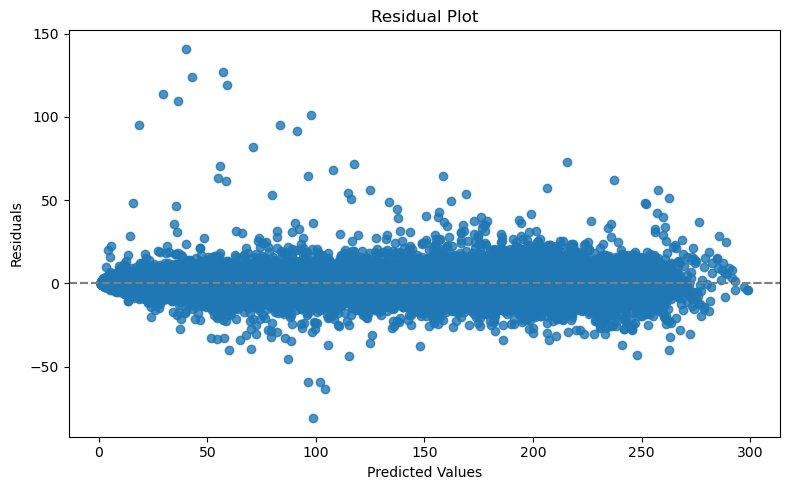

       id    Calories
0  750000   27.249672
1  750001  108.216248
2  750002   87.096779
3  750003  125.582733
4  750004   76.084633

count    250000.000000
mean         88.170555
std          62.251297
min           1.026899
25%          34.034648
50%          76.382866
75%         135.395931
max         296.643555
Name: Calories, dtype: float64


In [ ]:
# kaggle score 0.05850 private, 0.05713 public (autogluon_prediction_6.csv) (tied for 17th place out of 4318 teams)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_data, presets="best_quality", time_limit=10800, num_bag_folds=5)

# Make predictions
train_pred = predictor.predict(train_data)
test_pred = predictor.predict(test_data)
predictions = predictor.predict(test)

# Evaluate
print()
print("Train prediction:", rmse(train_pred, train_data['Calories']))
print("Test prediction:", rmse(test_pred, test_data['Calories']))



# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=np.expm1(test_pred), y=np.expm1(test_data['Calories']))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()



# make the submission file!

submission = pd.DataFrame()

submission['id'] = np.arange(len(test))+750000
submission['Calories'] = np.expm1(predictions)
submission.loc[submission['Calories'] < 0, 'Calories'] = 1

submission.to_csv("autogluon_prediction_6.csv", index=False)

print(submission.head())
print()
print(submission['Calories'].describe())

In [25]:
predictor.leaderboard().head(5)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.059467,root_mean_squared_error,0.780411,269.496987,0.000000,0.029802,2,True,11
1,CatBoost,-0.059849,root_mean_squared_error,0.004643,75.940046,0.004643,75.940046,1,True,6
2,LightGBM,-0.060178,root_mean_squared_error,0.053852,8.202973,0.053852,8.202973,1,True,4
3,LightGBMXT,-0.060273,root_mean_squared_error,0.389410,59.814317,0.389410,59.814317,1,True,3
4,XGBoost,-0.060399,root_mean_squared_error,0.013766,7.348167,0.013766,7.348167,1,True,9


In [13]:
info = predictor.info()

In [20]:
info['model_info']['WeightedEnsemble_L3']

{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 4.41398549079895,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00434422492980957,
 'val_score': np.float64(-0.05917111920106526),
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True,
  'stratify': 'auto',
  'bin': 'auto',
  'n_bins': None},
 'hyperparameters_user': {'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  '

In [18]:
info['model_info']['WeightedEnsemble_L3']['features']

['XGBoost_BAG_L1',
 'LightGBM_r96_BAG_L1',
 'LightGBM_BAG_L1',
 'LightGBMLarge_BAG_L2',
 'ExtraTreesMSE_BAG_L2',
 'LightGBMXT_BAG_L2',
 'XGBoost_r33_BAG_L1',
 'RandomForestMSE_BAG_L2',
 'NeuralNetFastAI_BAG_L2',
 'LightGBMXT_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'ExtraTrees_r42_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'LightGBM_BAG_L2']

No path specified. Models will be saved in: "AutogluonModels\ag-20250609_021201"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       15.98 GB / 31.61 GB (50.6%)
Disk Space Avail:   201.36 GB / 455.74 GB (44.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "c:\Users\eblac\Documents\GitHub\S25_Predict_Calories\AutogluonModels\ag-20250609_021201"
Train Data Rows:    600000
Train Data Columns: 7
Label Column:       Calories
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    16374.78 MB
	Train Data (Original)  Memory Usage: 58.37 MB (0.4% of available memory)
	Inferring data 

[1000]	valid_set's rmse: 0.062964
[2000]	valid_set's rmse: 0.0611037
[3000]	valid_set's rmse: 0.0606087
[4000]	valid_set's rmse: 0.0604203
[5000]	valid_set's rmse: 0.0603009
[6000]	valid_set's rmse: 0.0602908
[7000]	valid_set's rmse: 0.0602854
[8000]	valid_set's rmse: 0.0602883


	-0.0603	 = Validation score   (-root_mean_squared_error)
	59.81s	 = Training   runtime
	0.39s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 534.13s of the 534.13s of remaining time.


[1000]	valid_set's rmse: 0.0602035


	-0.0602	 = Validation score   (-root_mean_squared_error)
	8.2s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 525.80s of the 525.80s of remaining time.
	-0.063	 = Validation score   (-root_mean_squared_error)
	69.34s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 455.91s of the 455.91s of remaining time.
	-0.0598	 = Validation score   (-root_mean_squared_error)
	75.94s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 379.95s of the 379.95s of remaining time.
	-0.0616	 = Validation score   (-root_mean_squared_error)
	46.76s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 332.63s of the 332.63s of remaining time.
	-0.0624	 = Validation score   (-root_mean_squared_error)
	244.91s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBo


Train prediction: 0.051824851326364385
Test prediction: 0.05904950055715595


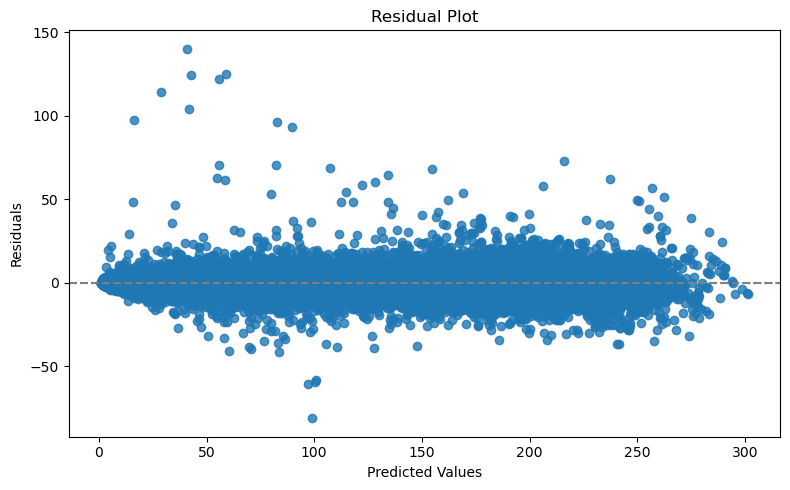

       id    Calories
0  750000   27.312332
1  750001  108.051903
2  750002   87.168686
3  750003  125.700249
4  750004   75.832199

count    250000.000000
mean         88.163040
std          62.242584
min           1.040007
25%          34.034207
50%          76.486252
75%         135.385044
max         297.873047
Name: Calories, dtype: float64


In [ ]:
# kaggle score 0.05884 private, 0.05705 public (autogluon_prediction_7.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_data, presets="medium_quality", time_limit=600)

# Make predictions
train_pred = predictor.predict(train_data)
test_pred = predictor.predict(test_data)
predictions = predictor.predict(test)

# Evaluate
print()
print("Train prediction:", rmse(train_pred, train_data['Calories']))
print("Test prediction:", rmse(test_pred, test_data['Calories']))



# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=np.expm1(test_pred), y=np.expm1(test_data['Calories']))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()



# make the submission file!

submission = pd.DataFrame()

submission['id'] = np.arange(len(test))+750000
submission['Calories'] = np.expm1(predictions)
submission.loc[submission['Calories'] < 0, 'Calories'] = 1

submission.to_csv("autogluon_prediction_7.csv", index=False)

print(submission.head())
print()
print(submission['Calories'].describe())

No path specified. Models will be saved in: "AutogluonModels\ag-20250608_132354"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       20.79 GB / 31.61 GB (65.8%)
Disk Space Avail:   210.93 GB / 455.74 GB (46.3%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~5x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluo


Train prediction: 0.053620534933876696
Test prediction: 0.059195473613880153


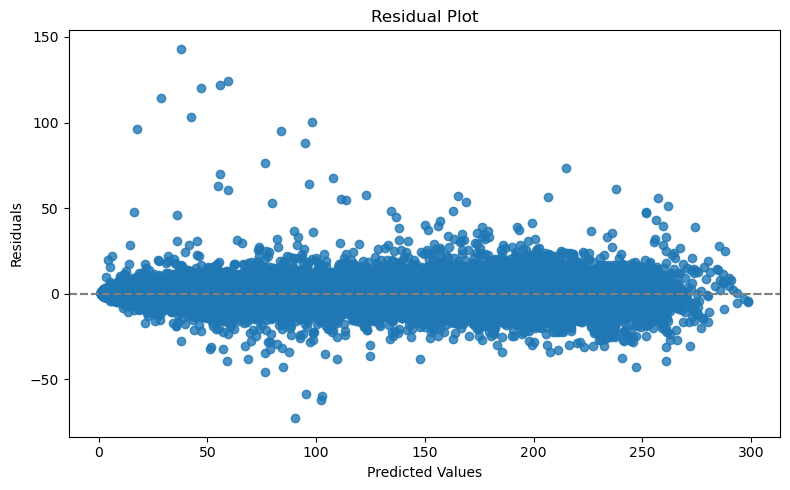

In [ ]:
# kaggle score 0.05883 private, 0.05741 public (autogluon_prediction_5.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_data, presets="high_quality", time_limit=3600, num_bag_folds=5)

# Make predictions
train_pred = predictor.predict(train_data)
test_pred = predictor.predict(test_data)
predictions = predictor.predict(test)

# Evaluate
print()
print("Train prediction:", rmse(train_pred, train_data['Calories']))
print("Test prediction:", rmse(test_pred, test_data['Calories']))

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=np.expm1(test_pred), y=np.expm1(test_data['Calories']))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# kaggle score 0.05919 private, 0.05747 public (autogluon_prediction_4.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_data, presets="medium_quality", time_limit=300, num_bag_folds=5)

# Make predictions
train_pred = predictor.predict(train_data)
test_pred = predictor.predict(test_data)
predictions = predictor.predict(test)

# Evaluate
print()
print("Train prediction:", rmse(train_pred, train_data['Calories']))
print("Test prediction:", rmse(test_pred, test_data['Calories']))

No path specified. Models will be saved in: "AutogluonModels\ag-20250608_125558"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       21.88 GB / 31.61 GB (69.2%)
Disk Space Avail:   211.25 GB / 455.74 GB (46.4%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\eblac\Documents\GitHub\S25_Predict_Calories\AutogluonModels\ag-20250608_125558"
Train Data Rows:    600000
Train Data Columns: 7
Label Column:       Calories
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    22409.51 MB
	Train Data (Original)  Memory Usage: 58.37 MB (0.3% of available memory)
	Inferring data 


Train prediction: 0.05441069429359686
Test prediction: 0.05956472067590435


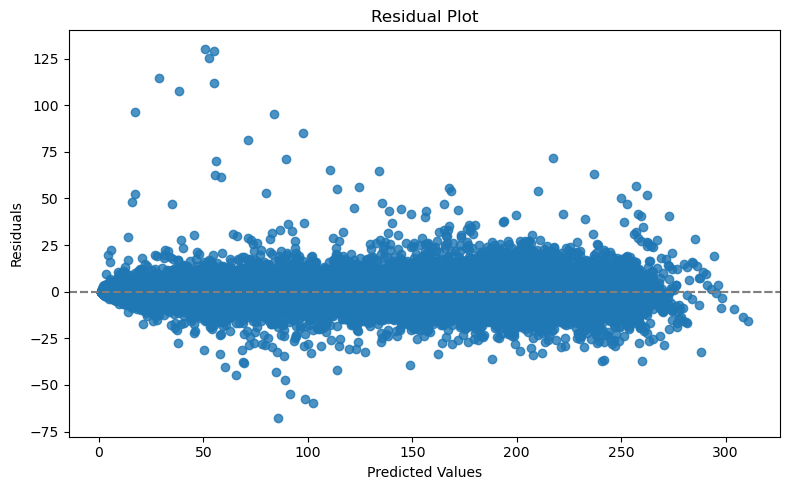

In [13]:
# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=np.expm1(test_pred), y=np.expm1(test_data['Calories']))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# kaggle score 0.05881 private, 0.05721 public (autogluon_prediction_1.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_log, presets="medium_quality", time_limit=300)

# Make predictions
train_pred = predictor.predict(train_log)
predictions = predictor.predict(test)

# Evaluate
rmse(train_pred, train_log['Calories'])

No path specified. Models will be saved in: "AutogluonModels\ag-20250608_021811"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       21.02 GB / 31.61 GB (66.5%)
Disk Space Avail:   217.62 GB / 455.74 GB (47.8%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\eblac\Documents\GitHub\S25_Predict_Calories\AutogluonModels\ag-20250608_021811"
Train Data Rows:    750000
Train Data Columns: 7
Label Column:       Calories
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    21528.97 MB
	Train Data (Original)  Memory Usage: 72.96 MB (0.3% of available memory)
	Inferring data 

[1000]	valid_set's rmse: 0.0583663
[2000]	valid_set's rmse: 0.0574904
[3000]	valid_set's rmse: 0.0571527
[4000]	valid_set's rmse: 0.0570552
[5000]	valid_set's rmse: 0.0569902
[6000]	valid_set's rmse: 0.0569527
[7000]	valid_set's rmse: 0.0569217
[8000]	valid_set's rmse: 0.0568853
[9000]	valid_set's rmse: 0.0568677
[10000]	valid_set's rmse: 0.0568868


	-0.0569	 = Validation score   (-root_mean_squared_error)
	74.4s	 = Training   runtime
	0.74s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 218.27s of the 218.27s of remaining time.


[1000]	valid_set's rmse: 0.0573116
[2000]	valid_set's rmse: 0.0569807


	-0.057	 = Validation score   (-root_mean_squared_error)
	14.52s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 203.51s of the 203.51s of remaining time.
	-0.0599	 = Validation score   (-root_mean_squared_error)
	92.17s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 110.87s of the 110.87s of remaining time.
		Import catboost failed. Numpy version may be outdated, Please ensure numpy version >=1.17.0. If it is not, please try 'pip uninstall numpy -y; pip install numpy>=1.17.0' Detailed info: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
Fitting model: ExtraTreesMSE ... Training model for up to 110.58s of the 110.58s of remaining time.
	-0.0582	 = Validation score   (-root_mean_squared_error)
	63.76s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up 

0.05459037003365895

In [ ]:
# kaggle score 0.05879 private, 0.05738 public (autogluon_prediction_2.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_log, presets="medium_quality", time_limit=1200)

# Make predictions
train_pred = predictor.predict(train_log)
predictions = predictor.predict(test)

# Evaluate
rmse(train_pred, train_log['Calories'])

No path specified. Models will be saved in: "AutogluonModels\ag-20250608_022940"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       20.72 GB / 31.61 GB (65.5%)
Disk Space Avail:   216.18 GB / 455.74 GB (47.4%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "c:\Users\eblac\Documents\GitHub\S25_Predict_Calories\AutogluonModels\ag-20250608_022940"
Train Data Rows:    750000
Train Data Columns: 7
Label Column:       Calories
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    21224.97 MB
	Train Data (Original)  Memory Usage: 72.96 MB (0.3% of available memory)
	Inferring data

[1000]	valid_set's rmse: 0.0583663
[2000]	valid_set's rmse: 0.0574904
[3000]	valid_set's rmse: 0.0571527
[4000]	valid_set's rmse: 0.0570552
[5000]	valid_set's rmse: 0.0569902
[6000]	valid_set's rmse: 0.0569527
[7000]	valid_set's rmse: 0.0569217
[8000]	valid_set's rmse: 0.0568853
[9000]	valid_set's rmse: 0.0568677
[10000]	valid_set's rmse: 0.0568868


	-0.0569	 = Validation score   (-root_mean_squared_error)
	72.02s	 = Training   runtime
	0.77s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1120.85s of the 1120.85s of remaining time.


[1000]	valid_set's rmse: 0.0573116
[2000]	valid_set's rmse: 0.0569807


	-0.057	 = Validation score   (-root_mean_squared_error)
	15.69s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1104.93s of the 1104.93s of remaining time.
	-0.0599	 = Validation score   (-root_mean_squared_error)
	92.79s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 1011.23s of the 1011.23s of remaining time.
		Import catboost failed. Numpy version may be outdated, Please ensure numpy version >=1.17.0. If it is not, please try 'pip uninstall numpy -y; pip install numpy>=1.17.0' Detailed info: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
Fitting model: ExtraTreesMSE ... Training model for up to 1010.95s of the 1010.95s of remaining time.
	-0.0582	 = Validation score   (-root_mean_squared_error)
	63.64s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model 

[1000]	valid_set's rmse: 0.0565734
[2000]	valid_set's rmse: 0.0563248


	-0.0563	 = Validation score   (-root_mean_squared_error)
	18.41s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 464.95s of remaining time.
	Ensemble Weights: {'LightGBMLarge': 0.462, 'LightGBMXT': 0.154, 'ExtraTreesMSE': 0.154, 'NeuralNetFastAI': 0.154, 'LightGBM': 0.077}
	-0.0559	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 735.2s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 6558.9 rows/s (7500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("c:\Users\eblac\Documents\GitHub\S25_Predict_Calories\AutogluonModels\ag-20250608_022940")


0.05154815464126633

In [ ]:
# kaggle score 0.05885 private, 0.05719 public (autogluon_prediction_3.csv)

# Train the model
predictor = TabularPredictor(label='Calories', problem_type='regression', eval_metric='root_mean_squared_error').fit(train_log, presets="high_quality", time_limit=2400)

# Make predictions
train_pred = predictor.predict(train_log)
predictions = predictor.predict(test)

# Evaluate
rmse(train_pred, train_log['Calories'])

No path specified. Models will be saved in: "AutogluonModels\ag-20250608_025423"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       20.72 GB / 31.61 GB (65.5%)
Disk Space Avail:   214.71 GB / 455.74 GB (47.1%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluo

(_ray_fit pid=21776) [1000]	valid_set's rmse: 0.0637074
(_ray_fit pid=21776) [2000]	valid_set's rmse: 0.0620222 [repeated 8x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=21928) [2000]	valid_set's rmse: 0.0597783 [repeated 6x across cluster]
(_ray_fit pid=21776) [3000]	valid_set's rmse: 0.0615233 [repeated 2x across cluster]
(_ray_fit pid=21928) [3000]	valid_set's rmse: 0.0594534 [repeated 6x across cluster]
(_ray_fit pid=21900) [4000]	valid_set's rmse: 0.0583267 [repeated 2x across cluster]
(_ray_fit pid=21928) [4000]	valid_set's rmse: 0.0593047 [repeated 6x across cluster]
(_ray_fit pid=21900) [5000]	valid_set's rmse: 0.058308 [repeated 2x across cluster]
(_ray_fit pid=11820) [5000]	valid_set's rmse: 0.0575062 [repeated 5x across cluster]
(_ray_fit pid=21928) [5000]	valid_set's rmse: 0.0592

(_ray_fit pid=22004) 	Ran out of time, early stopping on iteration 6120. Best iteration is:
(_ray_fit pid=22004) 	[6085]	valid_set's rmse: 0.0606495
(_dystack pid=9172) 	-0.06	 = Validation score   (-root_mean_squared_error)
(_dystack pid=9172) 	299.87s	 = Training   runtime
(_dystack pid=9172) 	1288.47s	 = Validation runtime
(_ray_fit pid=21988) 	Ran out of time, early stopping on iteration 5815. Best iteration is: [repeated 7x across cluster]
(_ray_fit pid=21988) 	[4868]	valid_set's rmse: 0.0602286 [repeated 7x across cluster]
(_dystack pid=9172) Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 101.55s of remaining time.
(_dystack pid=9172) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=9172) 	-0.0599	 = Validation score   (-root_mean_squared_error)
(_dystack pid=9172) 	0.7s	 = Training   runtime
(_dystack pid=9172) 	0.01s	 = Validation runtime
(_dystack pid=9172) Fitting 106 L2 models, fit_strategy="sequentia

(_ray_fit pid=15928) [1000]	valid_set's rmse: 0.0641508
(_ray_fit pid=16096) [1000]	valid_set's rmse: 0.06124


(_ray_fit pid=18924) 	Ran out of time, early stopping on iteration 1381. Best iteration is:
(_ray_fit pid=18924) 	[1381]	valid_set's rmse: 0.0619989
(_ray_fit pid=23344) 	Ran out of time, early stopping on iteration 1386. Best iteration is:
(_ray_fit pid=23344) 	[1386]	valid_set's rmse: 0.0610045
(_dystack pid=9172) 	-0.0614	 = Validation score   (-root_mean_squared_error)
(_dystack pid=9172) 	81.55s	 = Training   runtime
(_dystack pid=9172) 	158.81s	 = Validation runtime
(_ray_fit pid=20452) 	Ran out of time, early stopping on iteration 1407. Best iteration is: [repeated 6x across cluster]
(_ray_fit pid=20452) 	[1407]	valid_set's rmse: 0.0613614 [repeated 6x across cluster]
(_dystack pid=9172) Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the -5.43s of remaining time.
(_dystack pid=9172) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 0.8, 'LightGBMXT_BAG_L2': 0.2}
(_dystack pid=9172) 	-0.0599	 = Validation score   (-root_mean_squared_error)
(_dystack pid=9172) 	

0.05368685705790829

In [16]:
# make the submission file!

submission = pd.DataFrame()

submission['id'] = np.arange(len(test))+750000
submission['Calories'] = np.expm1(predictions)
submission.loc[submission['Calories'] < 0, 'Calories'] = 1

submission.to_csv("autogluon_prediction_5.csv", index=False)

print(submission.head())
print()
print(submission['Calories'].describe())

       id    Calories
0  750000   27.231379
1  750001  106.367813
2  750002   86.541473
3  750003  125.257576
4  750004   75.616745

count    250000.000000
mean         87.954445
std          62.076649
min           1.031719
25%          34.010962
50%          76.058853
75%         134.917290
max         297.208252
Name: Calories, dtype: float64
